## LASSO 回帰編

Lasso回帰の特徴はペナルティー項が大きさで行う。こうすることで、Ridge回帰よりも0に収束しやすく、分析が楽になる。
$$
E(w) = E(w) + E_{penalty}(w)\\
E_{penalty}(w) = \sum_m w_m\\
||w||_1 = |w_1|+⋯+|w_n|
$$

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pylab as plt

import sklearn

In [9]:
def truemodel(x, wtrue=np.array([-1, 0, 0, 1])): 
    return wtrue[3] * x**3 + wtrue[2] * x**2 + wtrue[1] * x + wtrue[0]

## データ生成

In [10]:
# Parameter
np.random.seed(12345)
sgm = 0.2

# 観測データ
N = 30
Xtrn = np.random.uniform(low=0.0, high=1.0, size=N)
ytrn = truemodel(Xtrn) + np.random.randn(N) * sgm 
dtrn = pd.DataFrame({'x': Xtrn, 'y': ytrn}) 
Xtrn = Xtrn[:, np.newaxis]   

# 評価用データ
Ntst = 20
Xtst = np.random.uniform(low=0.0, high=1.0, size=Ntst)
ytst = truemodel(Xtst) + sgm * np.random.randn(Ntst)
dtst = pd.DataFrame({'x': Xtst, 'y': ytst}) # 観測データはデータフレームに入れ込んでおく
Xtst = Xtst[:, np.newaxis]

Text(0.5, 1.0, 'Observed + Ideal')

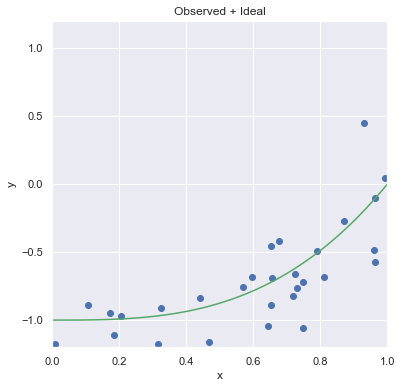

In [11]:
# 描画用データ
pltxrng=(0, 1.0)
pltyrng=(-1.2, 1.2)

# 真値の曲線
xx = np.linspace(pltxrng[0], pltxrng[1], 128)
yytrue = truemodel(xx)

# 表示
plt.figure(figsize=(6, 6))
plt.scatter(data=dtrn, x='x', y='y', c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(pltxrng[0], pltxrng[1])
plt.ylim(pltyrng[0], pltyrng[1])

plt.plot(xx, yytrue, 'g-')

plt.title('Observed + Ideal')

## 推定

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoLars # LassoはCD法なので，パラメータが少なければ Lars を使ったほうが吉
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
M = 10
halpha_ridge = 0.001
halpha_lasso = 0.0005
# OLSReg (Ordinary Least Square) と RidgeReg (Ridge )
OLSRegr = Pipeline([('poly', PolynomialFeatures(degree=M)), ('linear', LinearRegression(fit_intercept=True))])
RidgeRegr = Pipeline([('poly', PolynomialFeatures(degree=M)), ('ridge', Ridge(alpha=halpha_ridge, fit_intercept=True))])
#LASSORegr = Pipeline([('poly', PolynomialFeatures(degree=M)), ('lasso', Lasso(alpha=halpha_lasso, fit_intercept=True))])
LASSORegr = Pipeline([('poly', PolynomialFeatures(degree=M)), ('lasso', LassoLars(alpha=halpha_lasso, fit_intercept=True))])

OLSRegr.fit(Xtrn, ytrn)
RidgeRegr.fit(Xtrn, ytrn)

kwargs = {}
LASSORegr.fit(Xtrn, ytrn, **kwargs)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('lasso', LassoLars(alpha=0.0005))])

## 結果

Residual(OLS):  0.032145791502913315
Residual(Ridge):  0.05202699556292499
Residual(LASSO):  0.05245670342193521


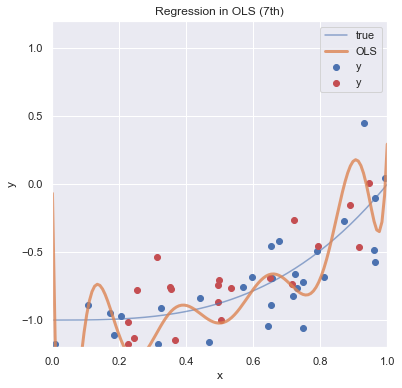

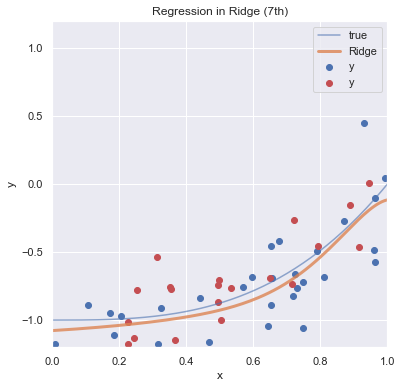

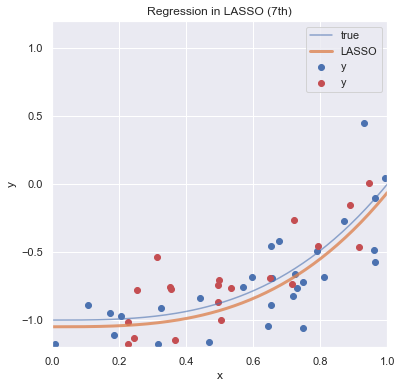

In [15]:
# OLS, Ridgeと比較
yOLS = OLSRegr.predict(xx[:, np.newaxis])
yRidge = RidgeRegr.predict(xx[:, np.newaxis])
yLASSO = LASSORegr.predict(xx[:, np.newaxis])

print('Residual(OLS): ', np.mean((OLSRegr.predict(Xtrn) - ytrn)**2))
print('Residual(Ridge): ', np.mean((RidgeRegr.predict(Xtrn) - ytrn)**2))
print('Residual(LASSO): ', np.mean((LASSORegr.predict(Xtrn) - ytrn)**2))

# 表示
for yobj, lbl in zip((yOLS, yRidge, yLASSO), ('OLS', 'Ridge', 'LASSO')):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1, xlabel='x', ylabel='y', xlim=pltxrng, ylim=pltyrng)
    ax.scatter(data=dtrn, x='x', y='y', c='b')
    ax.scatter(data=dtst, x='x', y='y', c='r')
    ax.plot(xx, yytrue, '-', alpha=0.6, label='true')
    ax.plot(xx, yobj, '-', linewidth=3, alpha=0.8, label=lbl)
    ax.set_title('Regression in {} (7th)'.format(lbl))
    ax.legend()